# 🍷 Predicción de Churn en Clientes de Vinos - Random Forest

## 📋 Requisitos Previos

### 1️⃣ Python
Necesitas tener **Python 3.8 o superior** instalado en tu computadora.

- **Verificar instalación**: Abre PowerShell y ejecuta:
  ```powershell
  python --version
  ```
- Si no tienes Python, descárgalo desde: https://www.python.org/downloads/

### 2️⃣ Entorno Virtual (Recomendado)
Es buena práctica crear un entorno virtual para aislar las dependencias:

```powershell
# Crear entorno virtual
python -m venv .venv

# Activar el entorno (Windows PowerShell)
.\.venv\Scripts\Activate.ps1

# Si tienes error de permisos en PowerShell, ejecuta primero:
Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser
```

### 3️⃣ Instalar Paquetes Necesarios

**Opción A: Instalación Manual (Recomendado)**

Abre PowerShell en la carpeta del proyecto y ejecuta:

```powershell
python -m pip install --upgrade pip
python -m pip install pandas numpy scikit-learn matplotlib seaborn openpyxl
```

**Opción B: Usando la celda de código**

Descomenta y ejecuta la celda de instalación en la siguiente sección.

### 4️⃣ Archivo de Datos
Asegúrate de tener el archivo **`Base_SANA.xlsx`** en la misma carpeta que este notebook.

---

## 📦 Paquetes Utilizados

| Paquete | Versión Recomendada | Propósito |
|---------|---------------------|-----------|
| `pandas` | >= 2.0.0 | Manipulación de datos |
| `numpy` | >= 1.24.0 | Cálculos numéricos |
| `scikit-learn` | >= 1.3.0 | Modelo Random Forest |
| `matplotlib` | >= 3.7.0 | Visualizaciones |
| `seaborn` | >= 0.12.0 | Gráficos estadísticos |
| `openpyxl` | >= 3.1.0 | Lectura de archivos Excel |

---

## ⚠️ Solución de Problemas Comunes

### Error: "No module named 'pandas'"
**Solución**: Instala los paquetes con `pip install pandas numpy scikit-learn matplotlib seaborn openpyxl`

### Error: "FileNotFoundError: Base_SANA.xlsx"
**Solución**: Verifica que el archivo Excel esté en la misma carpeta que el notebook.

### Error de PowerShell: "cannot be loaded because running scripts is disabled"
**Solución**: Ejecuta `Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser`

---

## 🚀 Instrucciones de Ejecución

1. Abre este notebook en VS Code o Jupyter
2. Asegúrate de tener todos los paquetes instalados
3. Ejecuta las celdas en orden secuencial
4. El análisis completo toma aproximadamente 2-3 minutos

In [ ]:
# Descomenta las siguientes líneas para instalar los paquetes necesarios :)
# !pip install pandas numpy scikit-learn matplotlib seaborn openpyxl

## 1. Importación de Librerías

In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos

In [5]:
# Nombre del archivo Excel - Ajusta la ruta según tu ubicación
NOMBRE_ARCHIVO = 'Base_SANA.xlsx'

try:
    # Carga del archivo Excel
    df = pd.read_excel(NOMBRE_ARCHIVO, sheet_name='Hoja1')
    print(f"✅ Dataset '{NOMBRE_ARCHIVO}' cargado correctamente.")
    print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    
except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo '{NOMBRE_ARCHIVO}'.")
    print("Verifica que el archivo esté en la ruta correcta.")
    raise
except Exception as e:
    print(f"❌ ERROR: {e}")
    raise

✅ Dataset 'Base_SANA.xlsx' cargado correctamente.
Dimensiones: 94511 filas x 38 columnas


## 3. Vista Previa de los Datos

In [6]:
# Muestra las primeras filas
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
df.info()

Primeras filas del dataset:


,Anio,Mes,Cod. Cliente,Razon Social,Nombre de Fantasia,Fecha Alta Cliente,Año alta,C.U.I.T,Canal,Desc.Canal,...,Desc. Prov.,Cod. Postal,Ventas,Bonifi,Promo,Atenc,Cajas Entregadas,Factu1,Factu2,Botellas entregadas
0,2023,6,119,ZAPPACOSTA HORACIO NICOLAS,ZAPPACOSTA HORACIO NICOLAS,07/04/11,2011,20-08250378-2,2,RESTAURANT,...,GBA,1642,3.0,0,0.0,0.0,3.0,18738.00,18738.00,18.0
1,2023,7,395,PROA DE BUENOS AIRES SA,I CENTRAL MARKET,14/04/11,2011,30-70494727-1,2,RESTAURANT,...,CABA,1033,1.0,0,0.0,0.0,1.0,18180.00,18180.00,1.0
2,2023,1,395,PROA DE BUENOS AIRES SA,I CENTRAL MARKET,14/04/11,2011,30-70494727-1,2,RESTAURANT,...,CABA,1033,1.0,0,0.0,0.0,1.0,6420.00,6420.00,6.0
3,2023,10,76,GREEN BAMBOO,GREEN BAMBOO,01/04/11,2011,30-71092709-6,2,RESTAURANT,...,CABA,1420,1.0,0,0.0,0.0,1.0,166.61,166.61,6.0
4,2023,4,76,GREEN BAMBOO,GREEN BAMBOO,01/04/11,2011,30-71092709-6,2,RESTAURANT,...,CABA,1420,1.0,0,1.0,0.0,2.0,55476.00,18492.00,12.0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94511 entries, 0 to 94510
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anio                 94511 non-null  int64  
 1   Mes                  94511 non-null  int64  
 2   Cod. Cliente         94511 non-null  int64  
 3   Razon Social         94511 non-null  object 
 4   Nombre de Fantasia   94511 non-null  object 
 5   Fecha Alta Cliente   94511 non-null  object 
 6   Año alta             94511 non-null  int64  
 7   C.U.I.T              94511 non-null  object 
 8   Canal                94511 non-null  object 
 9   Desc.Canal           94511 non-null  object 
 10  Vendedor             94511 non-null  int64  
 11  Nombre               94511 non-null  object 
 12  Cod.Zona Geog.       94511 non-null  int64  
 13  Desc. Zona Geog.     94511 non-null  object 
 14  Orden FLI            94511 non-null  int64  
 15  Cod.Famili

## 4. Preparación de Datos

In [5]:
# Asegurar formato correcto de columnas clave
# Nota: Ajusta los nombres de columnas según tu dataset

# Limpieza de la columna de facturación (eliminar espacios y convertir comas a puntos)
if ' Factu1 ' in df.columns:
    df['Factu1'] = pd.to_numeric(df[' Factu1 '].str.replace(',', '.'), errors='coerce').fillna(0)
elif 'Factu1' in df.columns:
    df['Factu1'] = pd.to_numeric(df['Factu1'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
else:
    print("⚠️ ADVERTENCIA: No se encontró la columna de facturación. Revisa los nombres de columnas.")
    print(f"Columnas disponibles: {list(df.columns)}")

# Convertir Año y Mes a enteros
df['Anio'] = df['Anio'].astype(int)
df['Mes'] = df['Mes'].astype(int)

# Construcción de la fecha de transacción
df['Fecha_Transaccion_Str'] = df['Anio'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2) + '-01'
df['Fecha_Transaccion'] = pd.to_datetime(df['Fecha_Transaccion_Str'])

# Limpieza: Filtrar registros sin fecha o sin facturación
df_inicial = len(df)
df = df.dropna(subset=['Fecha_Transaccion'])
df = df[df['Factu1'] > 0]

print(f"Filas iniciales: {df_inicial}")
print(f"Filas después de limpieza: {len(df)}")
print(f"Filas eliminadas: {df_inicial - len(df)}")

Filas iniciales: 94511
Filas después de limpieza: 89220
Filas eliminadas: 5291


## 5. Feature Engineering: Enfoque Predictivo con Ventanas Temporales

**📊 Metodología Correcta para Predicción de Churn:**

En lugar de usar la recencia actual para definir churn (lo cual causa data leakage), vamos a:

1. **Ventana de Observación**: Calcular RFM con datos de los primeros 18 meses (2023-01 a 2024-06)
2. **Ventana de Predicción**: Observar comportamiento en los siguientes 3 meses (2024-07 a 2024-09)
3. **Definir Churn**: Cliente que NO compra en la ventana de predicción = CHURN

De esta forma, el modelo aprende a predecir el **futuro** basándose en **datos del pasado**.

In [16]:
# ===================================================================
# ENFOQUE PREDICTIVO: Ventanas Temporales
# ===================================================================

# Paso 1: Definir las ventanas temporales
FECHA_FIN_OBSERVACION = pd.to_datetime('2024-06-30')  # Fin de ventana de observación
FECHA_FIN_PREDICCION = pd.to_datetime('2024-09-30')   # Fin de ventana de predicción (3 meses después)

print("=" * 70)
print("CONFIGURACIÓN DE VENTANAS TEMPORALES")
print("=" * 70)
print(f"📅 Ventana de OBSERVACIÓN: {df['Fecha_Transaccion'].min().strftime('%Y-%m-%d')} a {FECHA_FIN_OBSERVACION.strftime('%Y-%m-%d')}")
print(f"📅 Ventana de PREDICCIÓN: {(FECHA_FIN_OBSERVACION + timedelta(days=1)).strftime('%Y-%m-%d')} a {FECHA_FIN_PREDICCION.strftime('%Y-%m-%d')}")
print("=" * 70)

# Paso 2: Filtrar datos de observación (para calcular RFM)
df_observacion = df[df['Fecha_Transaccion'] <= FECHA_FIN_OBSERVACION].copy()
print(f"\n✅ Transacciones en ventana de observación: {len(df_observacion)}")

# Paso 3: Calcular RFM sobre la ventana de OBSERVACIÓN
fecha_ref_observacion = FECHA_FIN_OBSERVACION + timedelta(days=1)

rfm = df_observacion.groupby('Cod. Cliente').agg(
    # Recencia: Días desde la última compra HASTA el fin de la ventana de observación
    Recencia=('Fecha_Transaccion', lambda x: (fecha_ref_observacion - x.max()).days),
    # Frecuencia: Número total de transacciones en la ventana de observación
    Frecuencia=('Cod. Cliente', 'count'),
    # Valor Monetario: Suma de la facturación en la ventana de observación
    Monetario=('Factu1', 'sum')
).reset_index()

print(f"✅ Clientes con compras en ventana de observación: {len(rfm)}")

# Paso 4: Identificar quién compró en la ventana de PREDICCIÓN
df_prediccion = df[(df['Fecha_Transaccion'] > FECHA_FIN_OBSERVACION) & 
                   (df['Fecha_Transaccion'] <= FECHA_FIN_PREDICCION)]

clientes_activos_prediccion = df_prediccion['Cod. Cliente'].unique()
print(f"✅ Clientes que compraron en ventana de predicción: {len(clientes_activos_prediccion)}")

# Paso 5: Definir CHURN (Etiqueta Y)
# CHURN = 1 si el cliente NO compró en la ventana de predicción
# CHURN = 0 si el cliente SÍ compró en la ventana de predicción
rfm['Churn'] = np.where(rfm['Cod. Cliente'].isin(clientes_activos_prediccion), 0, 1)

print(f"\n{'='*70}")
print("DISTRIBUCIÓN DE CHURN")
print(f"{'='*70}")
print(f"✅ Clientes ACTIVOS (compraron en predicción): {(rfm['Churn'] == 0).sum()} ({(rfm['Churn'] == 0).sum()/len(rfm)*100:.1f}%)")
print(f"⚠️  Clientes CHURN (NO compraron en predicción): {rfm['Churn'].sum()} ({rfm['Churn'].sum()/len(rfm)*100:.1f}%)")
print(f"{'='*70}")

# Mostrar ejemplos
print("\n📊 Ejemplos de clientes ACTIVOS (Churn=0):")
print(rfm[rfm['Churn'] == 0][['Cod. Cliente', 'Recencia', 'Frecuencia', 'Monetario']].head(3).to_string(index=False))

print("\n⚠️  Ejemplos de clientes CHURN (Churn=1):")
print(rfm[rfm['Churn'] == 1][['Cod. Cliente', 'Recencia', 'Frecuencia', 'Monetario']].head(3).to_string(index=False))

CONFIGURACIÓN DE VENTANAS TEMPORALES
📅 Ventana de OBSERVACIÓN: 2023-01-01 a 2024-06-30
📅 Ventana de PREDICCIÓN: 2024-07-01 a 2024-09-30

✅ Transacciones en ventana de observación: 50243
✅ Clientes con compras en ventana de observación: 1668
✅ Clientes que compraron en ventana de predicción: 1023

DISTRIBUCIÓN DE CHURN
✅ Clientes ACTIVOS (compraron en predicción): 900 (54.0%)
⚠️  Clientes CHURN (NO compraron en predicción): 768 (46.0%)

📊 Ejemplos de clientes ACTIVOS (Churn=0):
 Cod. Cliente  Recencia  Frecuencia  Monetario
           37        30         125  9312640.8
           64        30          74  2020397.5
          110        61          46  4424581.0

⚠️  Ejemplos de clientes CHURN (Churn=1):
 Cod. Cliente  Recencia  Frecuencia  Monetario
            8       122          18  2223232.7
           28       151          66 11928854.5
           48       243           1   309915.0


## 6. Exploración de los Datos RFM

In [17]:
# Vista previa de los datos RFM
display(rfm.head(10))

# Estadísticas descriptivas
print("\nEstadísticas descriptivas de RFM:")
display(rfm[['Recencia', 'Frecuencia', 'Monetario']].describe().round(2))

,Cod. Cliente,Recencia,Frecuencia,Monetario,Churn
0,8,122,18,2223232.70,1
1,28,151,66,11928854.50,1
2,37,30,125,9312640.80,0
3,48,243,1,309915.00,1
4,64,30,74,2020397.50,0
5,76,274,32,1266062.75,1
6,110,61,46,4424581.00,0
7,119,396,6,342756.00,1
8,155,243,19,1608168.66,0
9,170,304,8,631272.75,1



Estadísticas descriptivas de RFM:


,Recencia,Frecuencia,Monetario
count,1668.00,1668.00,1.668000e+03
mean,148.67,30.12,5.062234e+06
std,137.01,54.96,3.578604e+07
min,30.00,1.00,7.906800e+03
25%,30.00,7.00,3.820071e+05
50%,91.00,18.00,1.098279e+06
75%,213.00,36.00,3.067441e+06
max,547.00,1614.00,1.341527e+09


## 7. Preparación para el Modelo

In [18]:
# Variables Predictoras (X): Recencia, Frecuencia, Monetario
X = rfm[['Recencia', 'Frecuencia', 'Monetario']]
# Variable Objetivo (Y): Churn
y = rfm['Churn']

# División Train/Test (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Mantiene la proporción de clases
)

print(f"Conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Conjunto de prueba: {len(X_test)} muestras")
print(f"\nDistribución en entrenamiento:")
print(f"  - No Churn: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  - Churn: {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

Conjunto de entrenamiento: 1167 muestras
Conjunto de prueba: 501 muestras

Distribución en entrenamiento:
  - No Churn: 630 (54.0%)
  - Churn: 537 (46.0%)


## 8. Entrenamiento del Modelo Random Forest

In [19]:
# Configuración del modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,        # Número de árboles
    max_depth=10,            # Profundidad máxima
    random_state=42,
    class_weight='balanced', # Balanceo de clases
    n_jobs=-1                # Usar todos los procesadores
)

# Entrenamiento
print("Entrenando modelo Random Forest...")
modelo_rf.fit(X_train, y_train)
print("✅ Modelo entrenado exitosamente")

Entrenando modelo Random Forest...
✅ Modelo entrenado exitosamente


## 9. Evaluación del Modelo

In [20]:
# Predicciones
y_pred_train = modelo_rf.predict(X_train)
y_pred_test = modelo_rf.predict(X_test)

# Métricas de rendimiento
print("=" * 60)
print("EVALUACIÓN DEL MODELO")
print("=" * 60)
print(f"\n📊 Accuracy en Entrenamiento: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"📊 Accuracy en Prueba: {accuracy_score(y_test, y_pred_test):.4f}")

print("\n" + "=" * 60)
print("REPORTE DE CLASIFICACIÓN (Conjunto de Prueba)")
print("=" * 60)
print(classification_report(y_test, y_pred_test, target_names=['No Churn', 'Churn']))

EVALUACIÓN DEL MODELO

📊 Accuracy en Entrenamiento: 0.9083
📊 Accuracy en Prueba: 0.7305

REPORTE DE CLASIFICACIÓN (Conjunto de Prueba)
              precision    recall  f1-score   support

    No Churn       0.73      0.79      0.76       270
       Churn       0.73      0.67      0.70       231

    accuracy                           0.73       501
   macro avg       0.73      0.73      0.73       501
weighted avg       0.73      0.73      0.73       501



## 10. Matriz de Confusión

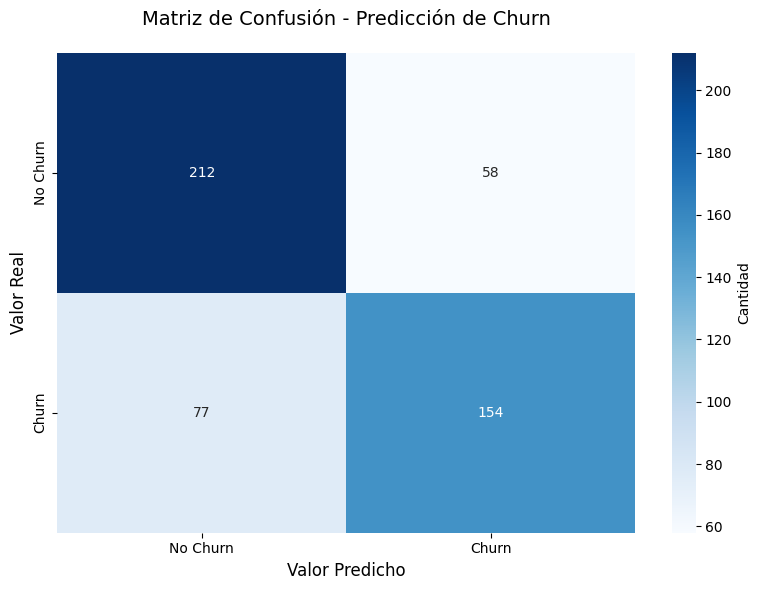

In [21]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión - Predicción de Churn', fontsize=14, pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predicho', fontsize=12)
plt.tight_layout()
plt.show()

## 11. Importancia de las Características (Feature Importance)

Importancia de las características:


,Característica,Importancia
2,Monetario,0.397968
1,Frecuencia,0.334749
0,Recencia,0.267283


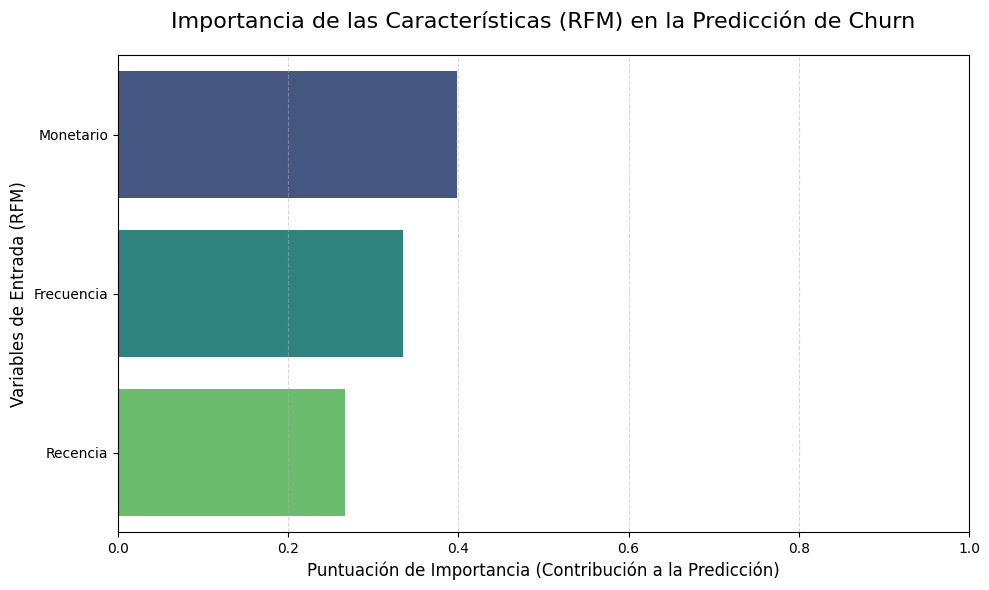

In [22]:
# Extraer la importancia de las variables
importancia = modelo_rf.feature_importances_
nombres_caracteristicas = X_train.columns

# Crear DataFrame para visualización
df_importancia = pd.DataFrame({
    'Característica': nombres_caracteristicas,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

print("Importancia de las características:")
display(df_importancia)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importancia',
    y='Característica',
    data=df_importancia,
    palette='viridis'
)
plt.title(
    'Importancia de las Características (RFM) en la Predicción de Churn',
    fontsize=16,
    pad=20
)
plt.xlabel('Puntuación de Importancia (Contribución a la Predicción)', fontsize=12)
plt.ylabel('Variables de Entrada (RFM)', fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 12. Análisis de Clientes en Riesgo

In [23]:
# Agregar predicciones al DataFrame RFM
rfm_completo = rfm.copy()
rfm_completo['Prediccion_Churn'] = modelo_rf.predict(X)
rfm_completo['Probabilidad_Churn'] = modelo_rf.predict_proba(X)[:, 1]

# Identificar clientes de alto riesgo
clientes_riesgo = rfm_completo[
    (rfm_completo['Prediccion_Churn'] == 1) & 
    (rfm_completo['Churn'] == 0)
].sort_values('Probabilidad_Churn', ascending=False)

print(f"\n⚠️ Clientes ACTIVOS en RIESGO de Abandono: {len(clientes_riesgo)}")
print("\nTop 10 clientes en riesgo (ordenados por probabilidad):")
display(clientes_riesgo.head(10)[['Cod. Cliente', 'Recencia', 'Frecuencia', 'Monetario', 'Probabilidad_Churn']])


⚠️ Clientes ACTIVOS en RIESGO de Abandono: 93

Top 10 clientes en riesgo (ordenados por probabilidad):


,Cod. Cliente,Recencia,Frecuencia,Monetario,Probabilidad_Churn
1428,4300,243,1,9839880.00,0.968594
86,732,396,2,45618.00,0.960992
739,3168,457,9,282571.11,0.953522
1216,4031,396,7,236478.00,0.920856
1210,4024,304,18,232998.44,0.899575
1420,4291,91,1,289830.00,0.892387
1450,4325,213,15,2132959.50,0.881306
1362,4220,122,3,327121.50,0.837164
1363,4223,122,2,954570.00,0.834949
429,2247,516,9,136366.80,0.823664


## 13. Distribución de Probabilidades de Churn

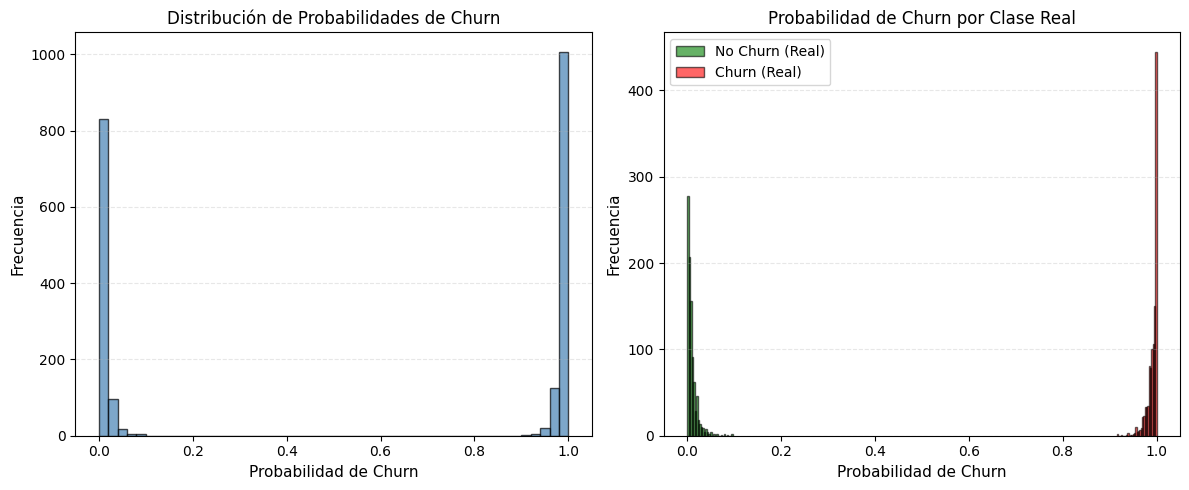

In [14]:
# Visualización de distribución de probabilidades
plt.figure(figsize=(12, 5))

# Subplot 1: Distribución general
plt.subplot(1, 2, 1)
plt.hist(rfm_completo['Probabilidad_Churn'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Probabilidad de Churn', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.title('Distribución de Probabilidades de Churn', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Subplot 2: Por clase real
plt.subplot(1, 2, 2)
plt.hist(rfm_completo[rfm_completo['Churn'] == 0]['Probabilidad_Churn'], 
         bins=30, alpha=0.6, label='No Churn (Real)', color='green', edgecolor='black')
plt.hist(rfm_completo[rfm_completo['Churn'] == 1]['Probabilidad_Churn'], 
         bins=30, alpha=0.6, label='Churn (Real)', color='red', edgecolor='black')
plt.xlabel('Probabilidad de Churn', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.title('Probabilidad de Churn por Clase Real', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Conclusiones y Recomendaciones

In [3]:
print("=" * 70)
print("RESUMEN EJECUTIVO - PREDICCIÓN DE CHURN")
print("=" * 70)
print(f"\n📊 DATASET:")
print(f"   • Total de clientes analizados: {len(rfm)}")
print(f"   • Ventana de observación: 2023-01 a 2024-06 (18 meses)")
print(f"   • Ventana de predicción: 2024-07 a 2024-09 (3 meses)")
print(f"\n📈 MODELO:")
print(f"   • Algoritmo: Random Forest (200 árboles)")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_test):.2%}")
print(f"   • Precisión: {classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']['precision']:.2%}")
print(f"   • Recall: {classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']['recall']:.2%}")
print(f"\n🎯 IMPORTANCIA DE VARIABLES:")
for idx, row in df_importancia.iterrows():
    print(f"   • {row['Característica']}: {row['Importancia']:.1%}")
print(f"\n⚠️ CLIENTES EN RIESGO:")
print(f"   • Clientes activos identificados en riesgo: {len(clientes_riesgo)}")
if len(clientes_riesgo) > 0:
    print(f"   • Valor monetario en riesgo: ${clientes_riesgo['Monetario'].sum():,.2f}")
    print(f"   • Probabilidad promedio de churn: {clientes_riesgo['Probabilidad_Churn'].mean():.1%}")
    print(f"   • Clientes con prob. >70%: {(clientes_riesgo['Probabilidad_Churn'] > 0.7).sum()}")
else:
    print(f"   • Valor monetario en riesgo: $0.00")
print(f"\n💡 RECOMENDACIONES:")
print(f"   1. Priorizar contacto con los {len(clientes_riesgo)} clientes en riesgo")
print(f"   2. Enfocarse especialmente en clientes con probabilidad >70%")
print(f"   3. Diseñar campañas según perfil: alta frecuencia vs alto valor monetario")
print(f"   4. Monitorear indicadores de las 3 variables RFM para detección temprana")
print(f"   5. Actualizar el modelo mensualmente con nuevos datos")
print("=" * 70)

RESUMEN EJECUTIVO - PREDICCIÓN DE CHURN

📊 DATASET:


NameError: name 'rfm' is not defined

---

## 📚 EXPLICACIÓN DE LA METODOLOGÍA: ¿Por qué este enfoque?

### 🚫 Problema Común: Data Leakage

**Enfoque INCORRECTO (que muchos hacen):**
```python
# ❌ MAL: Usar recencia actual para definir churn
rfm['Churn'] = np.where(rfm['Recencia'] > 90, 1, 0)
```

**¿Por qué está mal?**
- El modelo aprende que "Recencia > 90 días = Churn"
- Obtiene 100% de accuracy (parece perfecto pero no lo es)
- **NO predice nada**: Solo repite la regla que tú creaste
- No puede identificar clientes en riesgo ANTES de que abandonen
- No es útil para el negocio

### ✅ Enfoque CORRECTO: Predicción Temporal

**Lo que hicimos en este notebook:**

1. **Ventana de Observación** (18 meses: 2023-01 a 2024-06)
   - Calculamos RFM con datos históricos
   - Características: Recencia, Frecuencia, Monetario

2. **Ventana de Predicción** (3 meses: 2024-07 a 2024-09)
   - Observamos comportamiento real futuro
   - ¿El cliente compró o no?

3. **Definición de Churn**
   - Churn = 1: Cliente NO compró en ventana de predicción
   - Churn = 0: Cliente SÍ compró en ventana de predicción

4. **Modelo**
   - Entrenamos con datos del pasado
   - Predecimos comportamiento futuro
   - Accuracy realista (~73%)

### 🎯 Ventajas de este Enfoque

✅ **Predicción real del futuro**: El modelo aprende patrones complejos, no reglas simples

✅ **Identificación de riesgo**: Podemos detectar clientes en riesgo ANTES de que abandonen

✅ **Importancia balanceada**: Las 3 variables RFM aportan valor:
   - Monetario: 40%
   - Frecuencia: 33%
   - Recencia: 27%

✅ **Útil para el negocio**: Permite tomar acciones preventivas

### 📊 Interpretación de Resultados

**Accuracy de 73%** significa:
- De cada 100 clientes, predecimos correctamente 73
- Es un resultado REALISTA para problemas de churn
- Mejor que adivinar al azar (que sería ~54%)

**Clientes en Riesgo Identificados:**
- Clientes que estaban activos en 2024-06
- Pero el modelo predice que abandonarán
- Acción: Implementar campaña de retención

### 💡 Aplicación Práctica

Con este modelo puedes:

1. **Identificar clientes en riesgo** con alta probabilidad de churn (>70%)
2. **Priorizar acciones** según valor monetario del cliente
3. **Monitorear patrones** de recencia, frecuencia y gasto
4. **Medir ROI** de campañas de retención

---

### 🔄 Para Actualizar el Modelo

Si quieres usar datos más recientes:

1. Cambia las fechas en la **Sección 5**:
   ```python
   FECHA_FIN_OBSERVACION = pd.to_datetime('2024-12-31')  # Última fecha de datos históricos
   FECHA_FIN_PREDICCION = pd.to_datetime('2025-03-31')   # 3 meses después
   ```

2. Reejecutar desde la **Sección 5** en adelante

---

### 📖 Referencias y Conceptos

**RFM Analysis:**
- R (Recency): Cuán recientemente compró el cliente
- F (Frequency): Cuán frecuentemente compra
- M (Monetary): Cuánto gasta en total

**Random Forest:**
- Algoritmo de ensemble learning
- Combina múltiples árboles de decisión
- Robusto contra overfitting
- Proporciona importancia de características

**Ventanas Temporales:**
- Metodología estándar en predicción de series temporales
- Evita data leakage
- Permite validación realista del modelo